In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Homework 1


Parsing und aufbereiten der Daten

In [2]:
def read_data(path):
  output = np.zeros((1,1))
  input = np.zeros((1,100))
 
  with open(path, 'r') as f: 
      data_row = f.readlines()
  #data_rows = data_row.split("\n")
  #data_rows.remove('')
  j=0
  while j<len(data_row):
    data_cleaned = data_row[j].split("\t")
    if "POS" in data_cleaned[1]:
      output = np.vstack((output,np.array([1])))
    elif "NEG" in data_cleaned[1]:
      output = np.vstack((output,np.array([0])))
 
    local_vector = []
    for element in  data_cleaned[2].split(" "):
      local = element.replace('\n','')
      local_vector.append(float(local))
    arr = np.array(local_vector)
    input = np.vstack((input,arr))
    j+=1
  output = np.delete(output,0,0)
  input = np.delete(input,0,0)
 
  return input, output

In [3]:
def sig(x,deriv=False):
  if deriv:
    return sig(x)*(1-sig(x))
  else:
    return 1/(1+np.exp(-x))
 
class Perceptron(object):
  '''
  skeleton of one perceptron
  alpha: learning rate
  tau : batch size
  '''
  
  def __init__(self, weight, input, output,in_test,out_test,epochs, tau=10 ,alpha=0.01 ):
    self.weight = weight
    self.input = input
    self.output = output
    self.data = np.hstack((input,output))
    self.data_list = []
    self.alpha = alpha
    self.tau = tau
    self.epochs = epochs
    self.losses = []
    self.in_test = in_test
    self.out_test = out_test
 
  def weight_update(self):
    for i in self.data_list:
      w_sum = np.zeros(self.weight.shape)
      for j in i:
        input_loc = j[:-1]
        output_loc = j[-1:]
 
        value = np.dot(input_loc,self.weight)
        sum_part = (sig(value)-output_loc) * sig(value,True) * input_loc
        w_sum += sum_part.reshape(w_sum.shape)
      loc =self.weight
      self.weight = self.weight - (self.alpha/self.tau)* w_sum
      #print(np.sum(self.weight-loc))
      #what is being learned really?
  
  def Batch_set(self):
    np.random.shuffle(self.data)
    input_size = self.input.shape[0]
 
    array_count = input_size / self.tau
 
    data_list = []
 
    count=0
    for i in range(int(array_count)):
      leftover = input_size-count-self.tau
      end = 0
      if  leftover >= self.tau:
        end = self.tau
      else:
        end = leftover
      arr = []
      for j in range(end):
        arr.append(self.data[count])
        count += 1
      data_list.append(arr)
    self.data_list = data_list
 
  def Trainig(self):
    for e in range(self.epochs):
      self.Batch_set()
      self.weight_update()
      self.losses.append(self.Loss(self.in_test,self.out_test))
    print("Finished with",self.epochs," epochs")
 
  def Loss(self,test_input,test_output):
    loss_sum = 0
    for j in range(len(test_input)):
      val = np.dot(test_input[j],self.weight)
      loss_sum += np.power(sig(val)-test_output[j],2)
    return loss_sum
 
  def Accuracy(self,test_input,test_output):
    true = 0
    false = 0
    for j in range(len(test_input)):
      prediction = np.round(sig(np.dot(test_input[j],self.weight)))
      if prediction == test_output[j]:
        true += 1
      else:
        false +=1 
    return true/len(test_input)

In [4]:
path = "data"


x_dev, y_dev = read_data(path+'/rt-polarity.dev.vecs')
x_test, y_test = read_data(path+'/rt-polarity.test.vecs')
x_train, y_train = read_data(path+'/rt-polarity.train.vecs')
print("Done")

Done


In [5]:
# Bias Wert einfügen
print(x_dev.shape)
x_dev = np.hstack((x_dev, np.ones((x_dev.shape[0],1))))
print(x_dev.shape)
x_test= np.hstack((x_test, np.ones((x_test.shape[0],1))))
x_train= np.hstack((x_train, np.ones((x_train.shape[0],1))))
 
 
np.random.seed(0)
weight_initial = np.random.normal(0,1,(101,1))

(1599, 100)
(1599, 101)


(7464, 101)
Finished with 200  epochs
Loss on dev-set:  [475.13808648]
Accuracy on dev-set:  0.701688555347092
Loss on Test-set:  [456.88494177]
Accuracy on Test-set:  0.7129455909943715


<ipython-input-3-f03caf2a115d>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


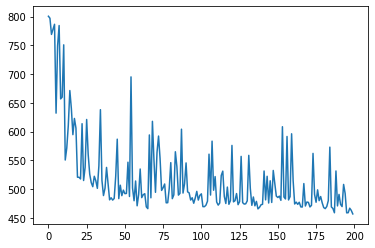

In [31]:
#Create model


print(x_train.shape)
model = Perceptron(weight_initial,x_train,y_train,x_test,y_test,epochs=200,tau=7,alpha=0.15)

model.Trainig()
plt.plot(model.losses)

print("Loss on dev-set: ",model.Loss(x_dev,y_dev))
print("Accuracy on dev-set: ",model.Accuracy(x_dev,y_dev))
print("Loss on Test-set: ",model.Loss(x_test,y_test))
print("Accuracy on Test-set: ",model.Accuracy(x_test,y_test))